In [33]:
import pandas as pd
# CSV 
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/HR_Inten_5d_Z.csv'

# 
df = pd.read_csv(file_path, encoding="utf-8")

In [35]:
df

,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,Glucose_std_pre_1_2.5h,Glucose_iqr_to_std_pre_1_2.5h,HR,Intensity,HR_mean_5d,HR_std_5d,Intensity_mean_5d,Intensity_std_5d,Z_HR,Z_Intensity
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,NaN,NaN,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,NaN,NaN,86.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,NaN,NaN,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,NaN,NaN,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,3.559026,1.334635,83.0,0.0,80.510460,14.670772,0.436590,0.753210,0.169694,-0.579640
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,4.086563,1.529402,79.0,0.0,80.531381,14.661451,0.436590,0.753210,-0.104449,-0.579640
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,5.085928,1.425502,89.0,1.0,80.556485,14.665664,0.438669,0.753382,0.575734,0.745081
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,4.593474,1.251776,84.0,0.0,80.569038,14.666039,0.438669,0.753382,0.233939,-0.582267


In [37]:
print(df.columns)

Index(['Timestamp', 'StudyID', 'Glucose', 'Relative_Day',
       'mean_glucose_previous_1day', '1D_G_Diff', 'mean_glucose_pre_3day',
       '3D_G_Diff', 'Previous_1_Time', 'Previous_1_Glucose',
       ...
       'Glucose_std_pre_1_2.5h', 'Glucose_iqr_to_std_pre_1_2.5h', 'HR',
       'Intensity', 'HR_mean_5d', 'HR_std_5d', 'Intensity_mean_5d',
       'Intensity_std_5d', 'Z_HR', 'Z_Intensity'],
      dtype='object', length=161)


# ADD 1H-Pre-Threshold 

In [40]:
import pandas as pd
import numpy as np



# 2. Timestamp 컬럼을 datetime으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 3. 사용할 기준 컬럼
threshold_col = 'Threshold'

# 4. 결과 저장용 리스트 초기화
result_list = []

# 5. StudyID별로 처리
for study_id, group in df.groupby('StudyID'):
    group = group.copy()
    group = group.sort_values('Timestamp')
    group.set_index('Timestamp', inplace=True)

    # 6. threshold 시리즈를 1시간 shift
    shifted = group[[threshold_col]].copy()
    shifted.index = shifted.index + pd.Timedelta(hours=1)
    shifted.rename(columns={threshold_col: '1h_pre_Thre'}, inplace=True)

    # 7. 원래 group과 병합
    merged = group.merge(shifted, how='left', left_index=True, right_index=True)

    # 8. Timestamp, StudyID 복원
    merged = merged.reset_index()
    merged['StudyID'] = study_id

    # 9. 필요한 컬럼만 저장
    result_list.append(merged[['Timestamp', 'StudyID', '1h_pre_Thre']])

# 10. 전체 결과 합치기
df_1h_pre = pd.concat(result_list, ignore_index=True)

# 11. 원래 df에도 Timestamp 컬럼이 있어야 병합 가능
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 12. 기존 df에 새로운 1시간 전 값 붙이기
df = df.merge(df_1h_pre, on=['Timestamp', 'StudyID'], how='left')


In [42]:
df

,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,Glucose_iqr_to_std_pre_1_2.5h,HR,Intensity,HR_mean_5d,HR_std_5d,Intensity_mean_5d,Intensity_std_5d,Z_HR,Z_Intensity,1h_pre_Thre
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,NaN,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,NaN,86.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,NaN,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,NaN,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,1.334635,83.0,0.0,80.510460,14.670772,0.436590,0.753210,0.169694,-0.579640,125.733298
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,1.529402,79.0,0.0,80.531381,14.661451,0.436590,0.753210,-0.104449,-0.579640,125.750726
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,1.425502,89.0,1.0,80.556485,14.665664,0.438669,0.753382,0.575734,0.745081,125.766295
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,1.251776,84.0,0.0,80.569038,14.666039,0.438669,0.753382,0.233939,-0.582267,125.760808


In [44]:
print(df.columns)

Index(['Timestamp', 'StudyID', 'Glucose', 'Relative_Day',
       'mean_glucose_previous_1day', '1D_G_Diff', 'mean_glucose_pre_3day',
       '3D_G_Diff', 'Previous_1_Time', 'Previous_1_Glucose',
       ...
       'Glucose_iqr_to_std_pre_1_2.5h', 'HR', 'Intensity', 'HR_mean_5d',
       'HR_std_5d', 'Intensity_mean_5d', 'Intensity_std_5d', 'Z_HR',
       'Z_Intensity', '1h_pre_Thre'],
      dtype='object', length=162)


In [46]:
# Save the modified DataFrame to CSV
df.to_csv("1_pre_threshold.csv", index=False)

In [48]:
# StudyID별로 1시간 전 (15분 x 4 = 60분) 값 가져오기
df['Glucose_pre_1h'] = df.groupby('StudyID')['Glucose'].shift(4)


In [50]:
df

,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,HR,Intensity,HR_mean_5d,HR_std_5d,Intensity_mean_5d,Intensity_std_5d,Z_HR,Z_Intensity,1h_pre_Thre,Glucose_pre_1h
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,86.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,83.0,0.0,80.510460,14.670772,0.436590,0.753210,0.169694,-0.579640,125.733298,74.0
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,79.0,0.0,80.531381,14.661451,0.436590,0.753210,-0.104449,-0.579640,125.750726,71.0
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,89.0,1.0,80.556485,14.665664,0.438669,0.753382,0.575734,0.745081,125.766295,71.0
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,84.0,0.0,80.569038,14.666039,0.438669,0.753382,0.233939,-0.582267,125.760808,86.0


In [52]:
# 1시간 전 (15분 * 4)

# 1.5시간 전 (15분 * 6)
df['Glucose_pre_1.5h'] = df.groupby('StudyID')['Glucose'].shift(6)

# 2시간 전 (15분 * 8)
df['Glucose_pre_2h'] = df.groupby('StudyID')['Glucose'].shift(8)

df


,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,HR_mean_5d,HR_std_5d,Intensity_mean_5d,Intensity_std_5d,Z_HR,Z_Intensity,1h_pre_Thre,Glucose_pre_1h,Glucose_pre_1.5h,Glucose_pre_2h
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,80.510460,14.670772,0.436590,0.753210,0.169694,-0.579640,125.733298,74.0,78.0,84.0
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,80.531381,14.661451,0.436590,0.753210,-0.104449,-0.579640,125.750726,71.0,76.0,83.0
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,80.556485,14.665664,0.438669,0.753382,0.575734,0.745081,125.766295,71.0,74.0,78.0
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,80.569038,14.666039,0.438669,0.753382,0.233939,-0.582267,125.760808,86.0,71.0,76.0


In [54]:
# 1.5시간 전 Threshold
df['Threshold_pre_1.5h'] = df.groupby('StudyID')['Threshold'].shift(6)

# 2시간 전 Threshold
df['Threshold_pre_2h'] = df.groupby('StudyID')['Threshold'].shift(8)


In [58]:
df

,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,Intensity_mean_5d,Intensity_std_5d,Z_HR,Z_Intensity,1h_pre_Thre,Glucose_pre_1h,Glucose_pre_1.5h,Glucose_pre_2h,Threshold_pre_1.5h,Threshold_pre_2h
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,0.436590,0.753210,0.169694,-0.579640,125.733298,74.0,78.0,84.0,125.717325,125.711054
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,0.436590,0.753210,-0.104449,-0.579640,125.750726,71.0,76.0,83.0,125.723277,125.711571
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,0.438669,0.753382,0.575734,0.745081,125.766295,71.0,74.0,78.0,125.733298,125.717325
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,0.438669,0.753382,0.233939,-0.582267,125.760808,86.0,71.0,76.0,125.750726,125.723277


In [64]:
df['G_minus_T_pre_1h'] = df['Glucose_pre_1h'] - df['1h_pre_Thre']
df['G_minus_T_pre_1.5h'] = df['Glucose_pre_1.5h'] - df['Threshold_pre_1.5h']
df['G_minus_T_pre_2h'] = df['Glucose_pre_2h'] - df['Threshold_pre_2h']
df

,Timestamp,StudyID,Glucose,Relative_Day,mean_glucose_previous_1day,1D_G_Diff,mean_glucose_pre_3day,3D_G_Diff,Previous_1_Time,Previous_1_Glucose,...,Z_Intensity,1h_pre_Thre,Glucose_pre_1h,Glucose_pre_1.5h,Glucose_pre_2h,Threshold_pre_1.5h,Threshold_pre_2h,G_minus_T_pre_1h,G_minus_T_pre_1.5h,G_minus_T_pre_2h
0,2022-10-06 01:34:00,1,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-06 01:49:00,1,76,1,NaN,NaN,NaN,NaN,2022-10-06 01:34:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-06 02:04:00,1,78,1,NaN,NaN,NaN,NaN,2022-10-06 01:49:00,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-06 02:19:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:04:00,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-06 02:34:00,1,75,1,NaN,NaN,NaN,NaN,2022-10-06 02:19:00,75.0,...,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,2023-05-09 19:08:00,89,114,14,94.84375,19.15625,98.052083,15.947917,2023-05-09 18:53:00,86.0,...,-0.579640,125.733298,74.0,78.0,84.0,125.717325,125.711054,-51.733298,-47.717325,-41.711054
71713,2023-05-09 19:23:00,89,136,14,94.84375,41.15625,98.052083,37.947917,2023-05-09 19:08:00,114.0,...,-0.579640,125.750726,71.0,76.0,83.0,125.723277,125.711571,-54.750726,-49.723277,-42.711571
71714,2023-05-09 19:38:00,89,142,14,94.84375,47.15625,98.052083,43.947917,2023-05-09 19:23:00,136.0,...,0.745081,125.766295,71.0,74.0,78.0,125.733298,125.717325,-54.766295,-51.733298,-47.717325
71715,2023-05-09 19:53:00,89,137,14,94.84375,42.15625,98.052083,38.947917,2023-05-09 19:38:00,142.0,...,-0.582267,125.760808,86.0,71.0,76.0,125.750726,125.723277,-39.760808,-54.750726,-49.723277


In [66]:
# Save the modified DataFrame to CSV
df.to_csv("pre_thre_glucose.csv", index=False)

In [68]:
# StudyID별 Onset_GE 합계 (Onset_GE가 1인 경우만 카운팅됨)
ge_counts = df.groupby('StudyID')['Onset_GE'].sum().reset_index()

# 컬럼 이름 보기 좋게 바꾸기
ge_counts.rename(columns={'Onset_GE': 'GE_Count'}, inplace=True)
ge_counts

,StudyID,GE_Count
0,1,11
1,2,14
2,3,0
3,7,29
4,8,18
...,...,...
69,84,15
70,85,23
71,86,27
72,87,26


In [70]:
# 1. Onset_GE 발생 횟수 계산
ge_counts = df[df['Onset_GE'] == 1].groupby('StudyID').size().reset_index(name='GE_Count')

# 2. Relative_Day 유일값 개수 계산 (1~14 중 실제 있는 날 수)
day_counts = df.groupby('StudyID')['Relative_Day'].nunique().reset_index(name='Num_Days_With_Data')

# 3. 병합
summary = pd.merge(day_counts, ge_counts, on='StudyID', how='left')

# 4. Onset_GE가 한 번도 없는 경우 NaN → 0으로 채움
summary['GE_Count'] = summary['GE_Count'].fillna(0).astype(int)

# 5. 보기 좋게 정렬 (예: Num_Days 기준)
summary = summary.sort_values(by='Num_Days_With_Data', ascending=False)
summary

,StudyID,Num_Days_With_Data,GE_Count
37,45,14,15
52,63,14,21
36,44,14,20
38,46,14,30
39,47,14,27
...,...,...,...
24,29,5,0
2,3,4,0
8,12,3,0
17,22,3,0


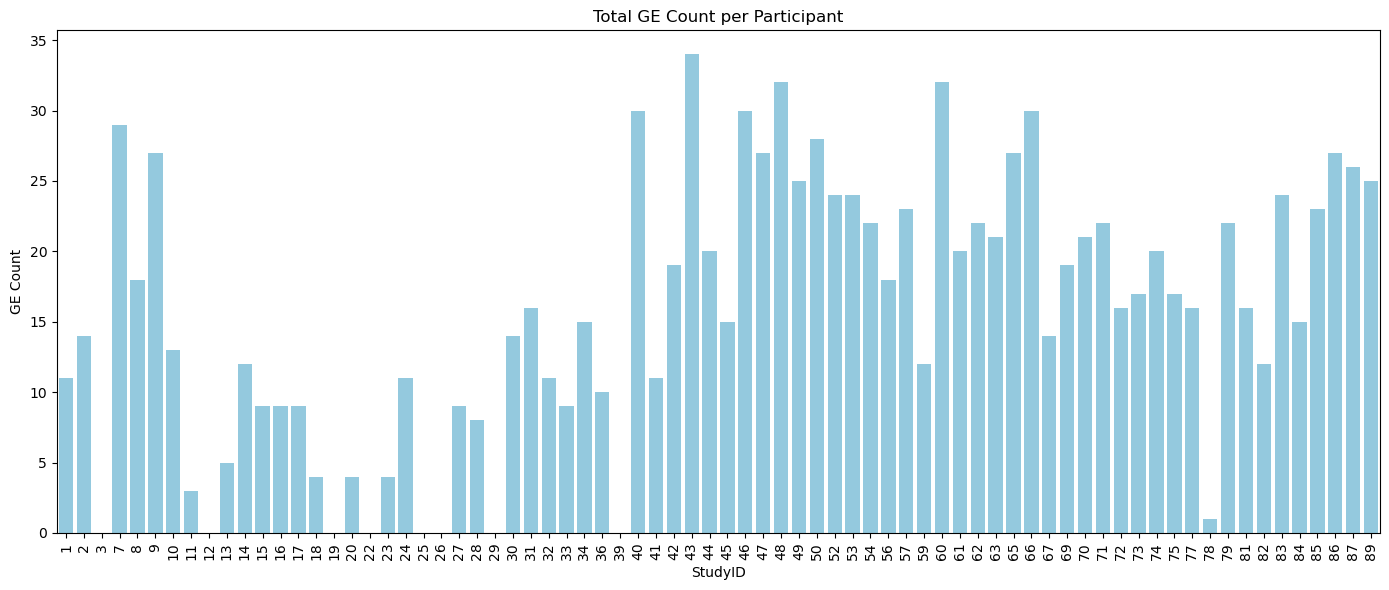

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# GE Count 막대그래프
plt.figure(figsize=(14, 6))
sns.barplot(data=summary, x='StudyID', y='GE_Count', color='skyblue')
plt.title('Total GE Count per Participant')
plt.xlabel('StudyID')
plt.ylabel('GE Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


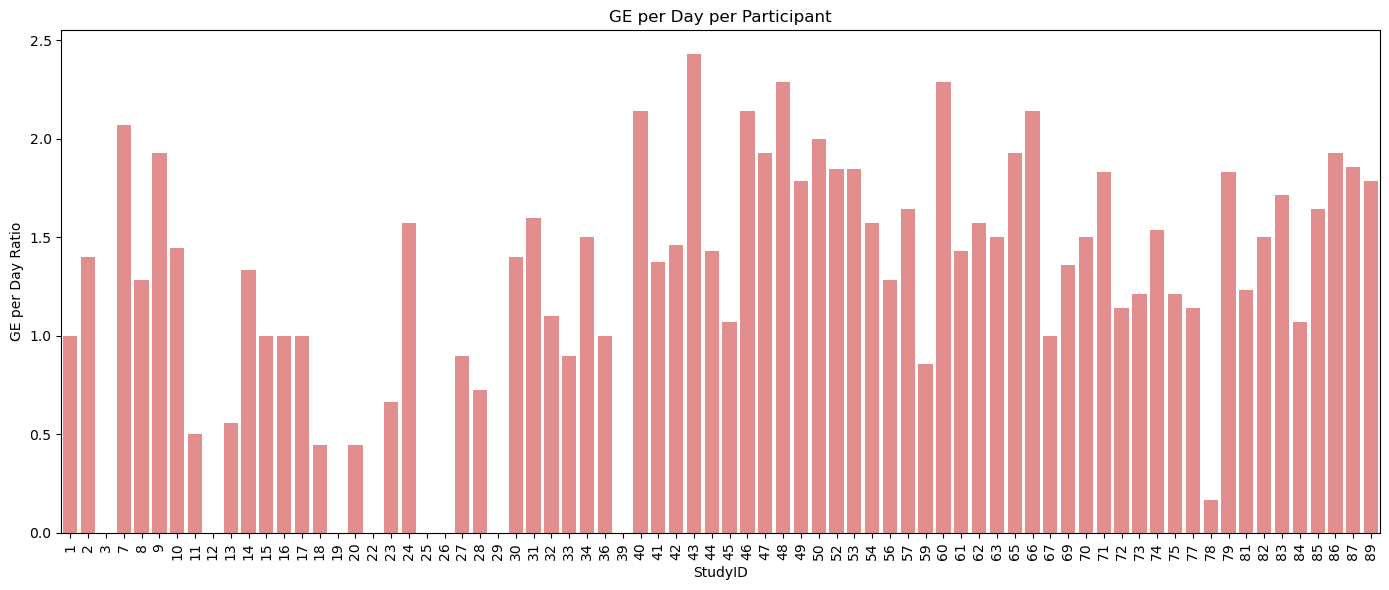

In [74]:
# GE/Day 비율 컬럼이 없다면 먼저 계산
summary['GE_per_day'] = summary['GE_Count'] / summary['Num_Days_With_Data']

# GE/day 막대그래프
plt.figure(figsize=(14, 6))
sns.barplot(data=summary, x='StudyID', y='GE_per_day', color='lightcoral')
plt.title('GE per Day per Participant')
plt.xlabel('StudyID')
plt.ylabel('GE per Day Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [80]:
# 원본 df에서 계산
num_days_per_person = df.groupby('StudyID')['Relative_Day'].nunique().reset_index(name='Num_Days')
low_day_participants = num_days_per_person[num_days_per_person['Num_Days'] <= 5]

# 출력
print(f"Number of participants with 5 or fewer days of data: {low_day_participants.shape[0]}")
print(low_day_participants['StudyID'].tolist())


Number of participants with 5 or fewer days of data: 7
[3, 12, 22, 25, 26, 29, 39]


In [82]:
# 제외할 StudyID 목록
excluded_ids = [3, 12, 22, 25, 26, 29, 39]

# 제외한 데이터프레임 만들기
df_filtered = df[~df['StudyID'].isin(excluded_ids)].copy()


In [86]:
# Save the modified DataFrame to CSV
df_filtered.to_csv("filtered_thre.csv", index=False)